In [3]:
import tensorflow as tf
import keras

In [4]:
tf.__version__

'2.16.1'

In [5]:
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

(x_train , y_train) , (x_test,y_test) =mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - accuracy: 0.8344 - loss: 0.6426
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9602 - loss: 0.1310
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9744 - loss: 0.0825


In [6]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9642 - loss: 0.1165
0.10556796938180923 0.9677000045776367


In [7]:
model.save('C:\\Users\\User\\juypter\\epiv_model.keras')

In [11]:
import tensorflow as tf

# Define the custom activation function if needed
def softmax_v2(x):
    # Your custom implementation here
    return tf.nn.softmax(x)

# Load the model with custom objects
custom_objects = {'softmax_v2': softmax_v2}
new_mod = tf.keras.models.load_model(r'C:\\Users\\User\\juypter\\epiv_model.keras', custom_objects=custom_objects)



In [16]:
import tensorflow as tf

# Define the custom activation function if needed
def softmax_v2(x):
    # Your custom implementation here
    return tf.nn.softmax(x)

# Load the model with custom objects
custom_objects = {'softmax_v2': softmax_v2}
new_mod = tf.keras.models.load_model(r'C:\Users\User\juypter\epiv_model.keras', custom_objects=custom_objects)


In [17]:
# Assuming x_test is your test data
predictions = new_mod.predict(x_test)
print(predictions)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
[[1.5535269e-08 4.7232982e-07 8.0964870e-05 ... 8.3899966e-13
  1.6452285e-13 1.3629260e-13]
 [9.1204250e-10 1.0565974e-04 9.9988627e-01 ... 9.9205968e-17
  6.0535306e-18 2.0320860e-16]
 [1.1927209e-07 9.9936336e-01 1.2209514e-04 ... 7.4919404e-11
  2.5047858e-11 2.2750660e-10]
 ...
 [1.1454988e-09 4.4558936e-07 3.0424934e-07 ... 1.5144120e-12
  1.8622081e-12 6.9144045e-13]
 [4.5231641e-06 1.9740871e-06 8.8311765e-07 ... 1.8099437e-11
  3.4358207e-11 1.6074488e-10]
 [5.1805131e-08 5.6816183e-09 8.8941675e-07 ... 7.0029723e-14
  1.5776531e-13 9.8714744e-14]]


In [18]:
import numpy as np

# Assuming predection is your predictions array
print(np.argmax(predictions[0]))


7


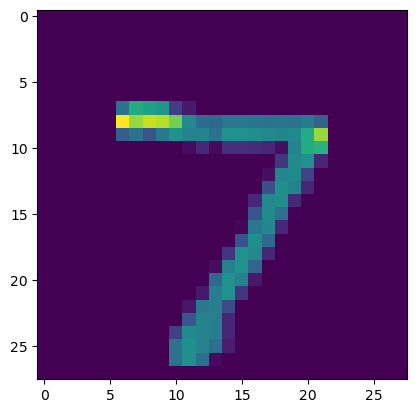

In [26]:
from sklearn.metrics import accuracy_score

# Assuming y_test is the true labels for the test data
accuracy = accuracy_score(y_test, np.argmax(predictions, axis=1))
print("Accuracy:", accuracy)


Accuracy: 0.9677


In [27]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 963    0    2    1    0    1   10    1    2    0]
 [   0 1113    5    1    0    0    3    0   13    0]
 [   3    1 1018    3    0    0    3    0    4    0]
 [   0    0   12  969    0   10    1    5   12    1]
 [   0    1    6    0  955    0   11    3    3    3]
 [   1    0    1   12    1  852   14    1    9    1]
 [   3    2    1    0    1    2  947    0    2    0]
 [   2    3   23    5    0    0    1  992    1    1]
 [   1    1    3    4    3    4    5    1  951    1]
 [   4    6    1   12   25   10    2   10   22  917]]


In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, np.argmax(predictions, axis=1))
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.99      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.95      0.99      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.99      0.91      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test contains the true labels for multiclass classification
conf_matrix = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, np.argmax(predictions, axis=1))
print("Classification Report:")
print(report)


Confusion Matrix:
[[ 963    0    2    1    0    1   10    1    2    0]
 [   0 1113    5    1    0    0    3    0   13    0]
 [   3    1 1018    3    0    0    3    0    4    0]
 [   0    0   12  969    0   10    1    5   12    1]
 [   0    1    6    0  955    0   11    3    3    3]
 [   1    0    1   12    1  852   14    1    9    1]
 [   3    2    1    0    1    2  947    0    2    0]
 [   2    3   23    5    0    0    1  992    1    1]
 [   1    1    3    4    3    4    5    1  951    1]
 [   4    6    1   12   25   10    2   10   22  917]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.99      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.95      0.99      0.97      

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is binary labels (0 and 1)
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])  # Assuming predictions[:, 1] are probabilities for the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported

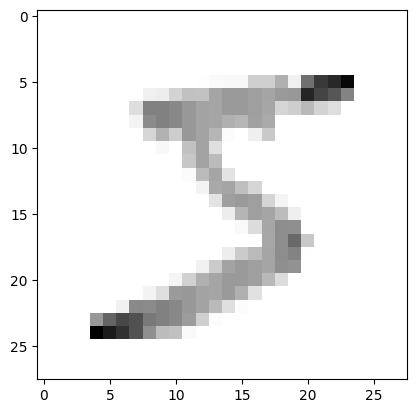

In [34]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()